<span style="color:green;float:right">Homepage: https://spkit.github.io</span>
<br><span style="color:green;float:right">Nikesh Bajaj : http://nikeshbajaj.in</span>

# DecisionTrees without converting Catogorical Features using SpKit

**Note**: Nost of ML libraries force us to convert the catogorycal features into one-hot vector or any numerical value. However, it should not be the case, **Not atleast with Decision Trees**, due a simple reason, of how decision tree works. In **spkit library**, Decision tree can handle mixed type input features, 'Catogorical' and 'Numerical'. In this notebook, I would use a dataset *hurricNamed* from *vincentarelbundock* github repository, and use only a few features, mixed of catogorical and numerical features. Converting number of deaths to binary with threshold of 10, we handle this as Classification Problem. 

However, it is not shown that coverting features into one-hot vector or any label encoder affects the performance of model, but, it is useful, when you need to visulize the decision process. Very important when you need to extract and simplify the decision rule.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries-and-Dataset" data-toc-modified-id="Libraries-and-Dataset-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Libraries and Dataset</a></span></li></ul></li><li><span><a href="#Classification----binary-class---hurricNamed-Dataset" data-toc-modified-id="Classification----binary-class---hurricNamed-Dataset-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Classification  - binary class - hurricNamed Dataset</a></span></li><li><span><a href="#Training," data-toc-modified-id="Training,-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Training,</a></span></li></ul></div>

### Libraries and Dataset

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split
import copy

In [130]:
np.random.seed(100) # just to ensure the reproducible results

In [131]:
import spkit
spkit.__version__

'0.0.9'

## Classification  - binary class - hurricNamed Dataset

In [133]:
from spkit.ml import ClassificationTree

In [137]:
D = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/DAAG/hurricNamed.csv')
feature_names = ['Name', 'AffectedStates','LF.WindsMPH','mf']#,'BaseDamage' 'Year','Year','LF.WindsMPH', 'LF.PressureMB','LF.times',


X = np.array(D[feature_names])
X[:,1] = [st.split(',')[0] for st in X[:,1]] #Choosing only first name of state from AffectedStates feature
y = np.array(D[['deaths']])[:,0]

# Converting target into binary with threshold of 10 deaths
y[y<10] =0
y[y>=10]=1

In [138]:
X,y

(array([['Easy', 'FL', 120, 'f'],
        ['King', 'FL', 130, 'm'],
        ['Able', 'SC', 85, 'm'],
        ['Barbara', 'NC', 85, 'f'],
        ['Florence', 'FL', 85, 'f'],
        ['Carol', 'NC', 120, 'f'],
        ['Edna', 'MA', 120, 'f'],
        ['Hazel', 'SC', 145, 'f'],
        ['Connie', 'NC', 120, 'f'],
        ['Diane', 'NC', 85, 'f'],
        ['Ione', 'NC', 120, 'm'],
        ['Flossy', 'LA', 105, 'f'],
        ['Audrey', 'TX', 145, 'f'],
        ['Helene', 'NC', 120, 'f'],
        ['Debra', 'TX', 85, 'f'],
        ['Gracie', 'SC', 120, 'f'],
        ['Donna', 'FL', 145, 'f'],
        ['Ethel', 'MS', 85, 'f'],
        ['Carla', 'TX', 145, 'f'],
        ['Cindy', 'TX', 85, 'f'],
        ['Cleo', 'FL', 105, 'f'],
        ['Dora', 'FL', 105, 'f'],
        ['Hilda', 'LA', 120, 'f'],
        ['Isbell', 'FL', 105, 'f'],
        ['Betsy', 'FL', 120, 'f'],
        ['Alma', 'FL', 105, 'f'],
        ['Inez', 'FL', 85, 'f'],
        ['Beulah', 'TX', 120, 'f'],
        ['Gladys', 'FL', 

## Training, 

Not doing training and testing, as objective is to show that it works

In [143]:
clf = ClassificationTree(max_depth=4)
clf.fit(X,y,feature_names=feature_names)
yp = clf.predict(X)

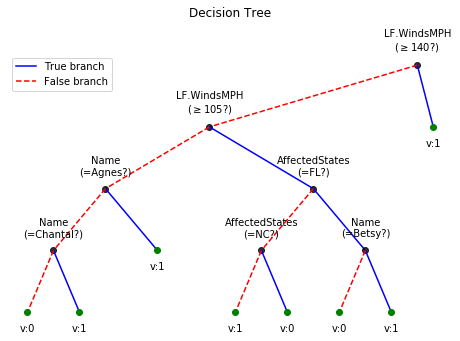

In [144]:
plt.figure(figsize=(8,5))
clf.plotTree()

Here, it can be seen that first feature 'LF.WindsMPH' is a numerical, thus the threshold is greater then equal to, however for catogorical features like 'Name' and 'AffectedStates'threshold is equal to only.